#  Использование одномерных сверток в PyTorch

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
* https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html#torch.nn.MaxPool1d
* https://wandb.ai/wandb_fc/wb-tutorials/reports/Tutorial-Text-Classification-Using-CNNs--Vmlldzo0NTIxNDI5
* https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

## Задачи для совместного разбора

1\. Изучите принцип работы одномерных сверточных слоев в `torch`

![1d conv](https://raw.githubusercontent.com/krzjoa/krzjoa.github.io/master/assets/img/2020-10-03-ts-and-torch-1/conv1d.gif)

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
X = th.randint(0, 10, size=(10, 1, 6)).float()
X.shape

torch.Size([10, 1, 6])

In [ ]:
X

tensor([[[0., 0., 1., 5., 0., 2.]],

        [[1., 0., 9., 7., 4., 0.]],

        [[4., 2., 7., 9., 8., 8.]],

        [[1., 0., 7., 0., 9., 9.]],

        [[5., 7., 2., 9., 0., 6.]],

        [[2., 0., 3., 5., 1., 3.]],

        [[6., 0., 1., 1., 0., 6.]],

        [[9., 2., 9., 1., 3., 9.]],

        [[6., 7., 8., 4., 6., 9.]],

        [[0., 3., 2., 1., 4., 4.]]])

In [ ]:
conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, bias=True)

In [ ]:
out = conv(X)
out.shape

torch.Size([10, 1, 4])

In [ ]:
#conv.weight, conv.weight.shape

In [ ]:
X[0, 0, 0:3] @ conv.weight[0][0]

tensor(-0.3579, grad_fn=<DotBackward0>)

![conv1d](https://api.wandb.ai/files/wandb_fc/images/projects/37754834/1f7be456.gif)

In [ ]:
conv = nn.Conv1d(in_channels=4, out_channels=1, kernel_size=2)

In [ ]:
conv.weight.shape

torch.Size([1, 4, 2])

In [ ]:
batch_size=16
embedding_dim = 4
seq_len = 6
X = th.rand(batch_size, embedding_dim, seq_len) # перепутаны размерности с нн ембеддинг
# прежде чем загонять в свертку, надо поменять размерности

In [ ]:
out = conv(X)
out.shape

torch.Size([16, 1, 5])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите данные из файла `ts.csv`. Используя модель, состоящую из одного одномерного сверточного слоя, решите задачу предсказания $y_t$ по `k` предыдущим точкам временного ряда $x_{t-k}...x_{t-1}$. Исследуйте значения $k\in[1, 7]$. Для каждого $k$ выведите на экран итоговое значение функции потерь и веса ядра свертки. Визуализируйте исходный временной ряд и полученные прогнозы.

- [ ] Проверено на семинаре

In [1]:
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch as th

In [2]:
df = pd.read_csv('ts.csv')
df.head()

,x,y
0,-2.103694,-1.156378
1,-1.081334,0.008044
2,17.530135,-4.130848
3,16.535054,-3.007267
4,20.868080,2.944139


In [3]:
len(df)

1005

In [4]:
X = th.tensor(df['x'], dtype=th.float).view(1, 1, 1005)
y = th.tensor(df['y'], dtype=th.float)

In [20]:
lr = 0.1
n_epochs = 5
preds = []

crit = nn.MSELoss()

for k in range(1, 8):
    conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=k, bias=True)
    optimizer = optim.Adam(conv.parameters(), lr=lr)
    for epoch in range(n_epochs):
        out = conv(X)
        loss = crit(out[0, 0], y[k-1:])
        loss.backward()
        if epoch == n_epochs - 1:
            preds.append(out)

        optimizer.step()
        optimizer.zero_grad()
        print(f'epoch = {epoch}', conv.weight, loss.item())

epoch = 0 Parameter containing:
tensor([[[0.3461]]], requires_grad=True) 36.199440002441406
epoch = 1 Parameter containing:
tensor([[[0.4237]]], requires_grad=True) 16.270313262939453
epoch = 2 Parameter containing:
tensor([[[0.4490]]], requires_grad=True) 20.909677505493164
epoch = 3 Parameter containing:
tensor([[[0.4353]]], requires_grad=True) 26.23672103881836
epoch = 4 Parameter containing:
tensor([[[0.4024]]], requires_grad=True) 23.14927101135254
epoch = 0 Parameter containing:
tensor([[[-0.4144,  0.5976]]], requires_grad=True) 279.21185302734375
epoch = 1 Parameter containing:
tensor([[[-0.3203,  0.6901]]], requires_grad=True) 106.97063446044922
epoch = 2 Parameter containing:
tensor([[[-0.2422,  0.7611]]], requires_grad=True) 47.58245086669922
epoch = 3 Parameter containing:
tensor([[[-0.1921,  0.7962]]], requires_grad=True) 70.19435119628906
epoch = 4 Parameter containing:
tensor([[[-0.1721,  0.7970]]], requires_grad=True) 110.47206115722656
epoch = 0 Parameter containing:
te

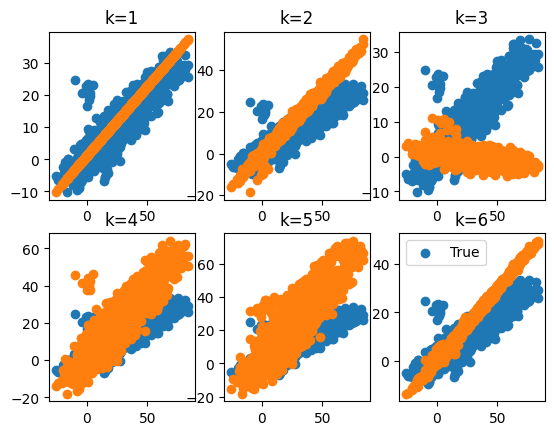

In [55]:
k = 0
fig, ax = plt.subplots(nrows=2, ncols=3)
for i in range(2):
    for j in range(3):
        ax[i][j].scatter(df['x'], df['y'], label=True)
        ax[i][j].scatter(df['x'][k:], preds[k][0][0].detach().numpy())
        ax[i][j].set_title(f'k={k + 1}')
        k += 1
plt.legend();

<p class="task" id="2"></p>

2\. Загрузите файл `PV_Elec_Gas2.csv`. Опишите класс `ElectricityDataset`, который разбивает данные на окна в соответствии со следующей схемой:

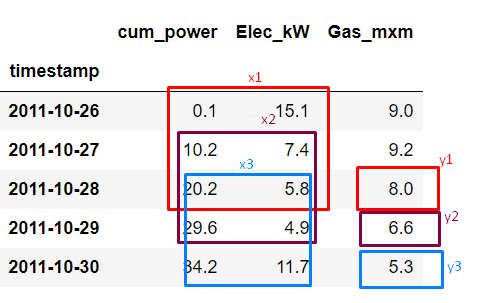

Разбейте набор данных на обучающую и тестовую выборку. Для теста оставьте данные за 2019 год.

- [ ] Проверено на семинаре

In [ ]:
df = pd.read_csv('PV_Elec_Gas2.csv')
df.head()

,Unnamed: 0,cum_power,Elec_kW,Gas_mxm
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


In [69]:
from torch.utils.data import Dataset

In [ ]:
class ElectricityDataset(Dataset):
    def __init__(self, df):
        self.X = df.drop(columns=['Gas_mxm', 'Unnamed: 0']).values
        self.y = df['Gas_mxm'].values
        self.split_dset()

    def split_dset(self, window=3):
        windows_X = []
        windows_y = []
        for i in range(len(self.X) - window + 1):
            window_data = self.X[i:i+window]
            windows_X.append(window_data)

        self.win_X = th.tensor(windows_X)
        self.win_y = th.tensor(self.y[window - 1:])

    def __getitem__(self, idx):
        return self.win_X[idx], self.win_y[idx]

    def __len__(self):
        return len(self.win_X)

In [ ]:
dset = ElectricityDataset(df)

In [ ]:
df.head()

,Unnamed: 0,cum_power,Elec_kW,Gas_mxm
0,2011,0.1,15.1,9.0
1,2011,10.2,7.4,9.2
2,2011,20.2,5.8,8.0
3,2011,29.6,4.9,6.6
4,2011,34.2,11.7,5.3


In [ ]:
dset[0][0].shape

torch.Size([3, 2])

In [ ]:
df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: x.split('-', maxsplit=1)[0])
df['Unnamed: 0'].head(2)

0    2011
1    2011
Name: Unnamed: 0, dtype: object

In [ ]:
df_test = df[df['Unnamed: 0'] == '2019']
df_train = df[df['Unnamed: 0'] != '2019']

In [ ]:
dset_train = ElectricityDataset(df_train)
dset_test = ElectricityDataset(df_test)

<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Gas_mxm` на основе столбцов `cum_power` и `Elec_kW` с использованием одномерных сверток. Для оптимизации используйте мини-пакетный градиентный спуск с использованием `DataLoader`. Обратите внимание, что при создании `DataLoader` вы не можете перемешивать данные.

Постройте график изменения значения функции потерь на обучающем и тестовом множестве в зависимости от номера эпохи. Визуализируйте на одном графике прогнозы модели и предсказываемый временной ряд.

- [ ] Проверено на семинаре

In [70]:
from torch.utils.data import DataLoader

In [ ]:
dl = DataLoader(
    dset_train,
    batch_size=120,
    shuffle=False
)

In [ ]:
dl_test = DataLoader(
    dset_test,
    batch_size=120,
    shuffle=False
)

In [ ]:
model = nn.Sequential(
    nn.Conv1d(in_channels=2, out_channels=10, kernel_size=2, bias=True),
    nn.ReLU(),
    nn.Conv1d(in_channels=10, out_channels=1, kernel_size=1, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=2, out_features=1)
)

for X, y in dl:
    print(model[0](X.view(-1, 2,3).float()).shape)
    #print(y.shape)
    # print(X.shape)
    out = model(X.view(-1, 2,3).float())
    print(out.shape)
    break

torch.Size([120, 10, 2])
torch.Size([120, 1, 1])


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
for X_, y_ in dl:
    out = model(X_.view(-1, 2,3).float())
    print(out[:0,0].shape)
    print(y.shape)
    break

torch.Size([0, 1])
torch.Size([120])


In [ ]:
import torchmetrics

In [ ]:
n_epochs = 10
lr = 0.1

model = nn.Sequential(
    nn.Conv1d(in_channels=2, out_channels=10, kernel_size=2, bias=True),
    nn.ReLU(),
    nn.Conv1d(in_channels=10, out_channels=1, kernel_size=2, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=1, out_features=1)
)

crit = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

l_train, l_test = [], []
preds, preds_test = th.tensor([]), th.tensor([])

for epoch in range(n_epochs):
    train_losses, test_losses = [], []
    for X_, y_ in dl:
        out = model(X_.view(-1, 2,3).float())
        loss = crit(out[:,0,0], y_.float())
        loss.backward()
        train_losses.append(loss.item())

        optimizer.step()
        optimizer.zero_grad()

        if epoch == n_epochs - 1:
            preds = th.cat((preds, out))
    l_train.append(th.tensor(train_losses).mean())

    model.eval()
    for X_test, y_test in dl_test:
        out = model(X_test.view(-1, 2,3).float())
        loss = crit(out[:,0,0], y_test.float())
        test_losses.append(loss.item())
        if epoch == n_epochs - 1:
            preds_test = th.cat((preds_test, out))
    l_test.append(th.tensor(test_losses).mean())
    model.train()

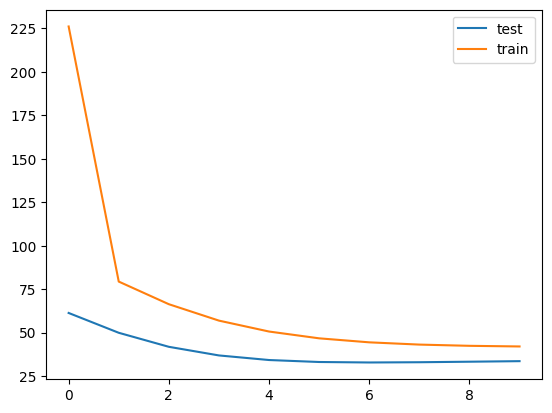

In [ ]:
import matplotlib.pyplot as plt

plt.plot(l_test, label='test')
plt.plot(l_train, label='train')
plt.legend();

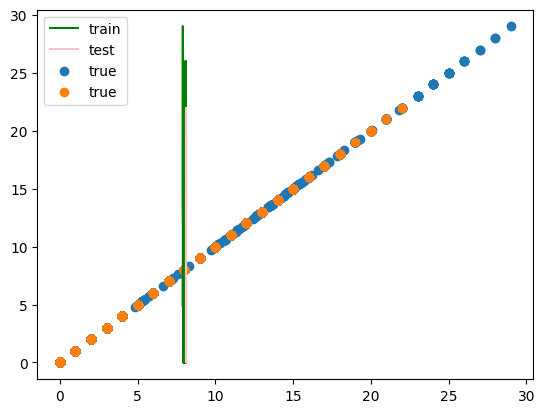

In [ ]:
plt.plot(preds.flatten().detach().numpy(), dset_train[:][1], label='train', color='green')
plt.plot(preds_test.flatten().detach().numpy(), dset_test[:][1], label='test', color='pink')
plt.scatter(dset_train[:][1], dset_train[:][1], label='true')
plt.scatter(dset_test[:][1], dset_test[:][1], label='true')
plt.legend()
plt.legend();

<p class="task" id="4"></p>

4\. Считайте файлы `polarity/positive_reviews.csv` (положительные обзоры на фильмы) и `polarity/negative_reviews.csv` (отрицательные обозоры на фильмы) и разбейте на обучающую и тестовую выборку. Выполните предобработку текста и создайте Vocab на основе обучающей выборки (токен - слово). Выведите на экран количество токенов в полученном словаре.

Создайте класс `PolarityDataset` и реализуйте метод `__getitem__` таким образом, чтобы он возвращал набор индексов токенов (слов) для текста и метки классов для этих текстов. Создайте два объекта класса `PolarityDataset` для обучающей и тестовой выборки. Выведите на экраны количество элементов и распределение данных по классам в каждом из них.

- [ ] Проверено на семинаре

In [57]:
negative = pd.read_csv('polarity/positive_reviews.txt',sep='\t', header=None)
negative['label'] = [0] * len(negative)
negative.head()

,0,label
0,"simplistic , silly and tedious .",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0


In [58]:
positive = pd.read_csv('polarity/negative_reviews.txt',sep='\t', header=None)
positive['label'] = [1] * len(positive)
positive.head()

,0,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [59]:
from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [60]:
import re
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

In [61]:
positive[0] = positive[0].apply(preprocess_text)
negative[0] = negative[0].apply(preprocess_text)

In [62]:
reviews = pd.concat([positive, negative])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    reviews[0],
    reviews['label'],
    test_size = 0.2,
    random_state=42
)

In [64]:
corpus = []
for sent in X_train.values:
    words = word_tokenize(sent)
    corpus.append(words)

In [65]:
from torchtext.vocab import build_vocab_from_iterator
vocab_train = build_vocab_from_iterator(corpus, specials = ['<pad>', '<unk>'])
vocab_train.set_default_index(vocab_train['<unk>'])

In [66]:
len(vocab_train.get_stoi())

18273

In [71]:
import torchtext.transforms as T
class PolarityDataset(Dataset):
    def __init__(self, X, y):
      self.label = y.values
      self.X = X.values
      self.corpus = []
      for sent in X.values:
          words = word_tokenize(sent)
          self.corpus.append(words)
      self.vocab = vocab_train
      self.transform = T.Sequential(
          T.ToTensor(0),
          T.PadTransform(max_length=self.get_max_len(), pad_value=0)
      )

    def __getitem__(self, idx):
      t = self.corpus[idx]
      l = self.label[idx]

      if type(idx) == int:
          vectors = [self.vocab.lookup_indices([word])[0] for word in t]
      else:
          vectors = [[self.vocab.lookup_indices([word])[0] for word in sent] for sent in t]
      return self.transform(vectors), th.tensor(l)

    def __len__(self):
        return len(self.X)

    def get_max_len(self):
        return max(len(x) for x in self.corpus)

In [72]:
train_dset = PolarityDataset(X_train, y_train)
test_dset = PolarityDataset(X_test, y_test)

In [73]:
train_dset.get_max_len()

51

In [74]:
len(train_dset), len(test_dset)

(8529, 2133)

In [75]:
print(f'Положительных отзывов в тесте: {train_dset[:][1].sum()}, и трейне: {test_dset[:][1].sum()}')

Положительных отзывов в тесте: 4269, и трейне: 1062


<p class="task" id="5"></p>

5\. Решите задачу классификации текстов обзоров с использованием одномерных сверток. Для преобразования последовательности индексов в последовательность векторов используйте слой `nn.Embedding`. Обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`. Выведите на экран отчет по классификации для обучающей и тестовой выборки после завершения процесса обучения. Добейтесь accuracy на тестовой выборке не менее 70%.

- [ ] Проверено на семинаре

In [154]:
class Net(nn.Module):
  def __init__(self):
    super().__init__() # X : batch_size x seq_len
    self.emb = nn.Embedding(
        num_embeddings = len(vocab_train), embedding_dim = 300
      ) # batch_size x seq_len x embedding_dim
    self.conv1 = nn.Conv1d(in_channels=300, out_channels=32, kernel_size=3)
    #
    self.conv2 = nn.Conv1d(in_channels=32, out_channels=1, kernel_size=2, bias=True)
    self.fc1 = nn.Linear(
        in_features = 48, out_features = 14
      )
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(
        in_features = 14, out_features = 2
      )

  def forward(self, X):
    e = self.emb(X)
    c = self.conv1(e.view(-1, 300, 51))
    c2 = self.conv2(c)
    #e = e.mean(dim=1)
    out = self.fc1(c2)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [152]:
train_loader = DataLoader(
    train_dset,
    batch_size=100
)

In [79]:
test_loader = DataLoader(
    test_dset,
    batch_size=100
)

In [100]:
for X_, y_ in train_loader:
    out = model(X_)
    print(out.shape)
    out = out.reshape(100, 2)
    #loss = crit(out.float(), y_)
    print(out.shape)
    print(y_.shape)
    break

torch.Size([100, 1, 2])
torch.Size([100, 2])
torch.Size([100])


In [155]:
model = Net()

lr = 0.01
n_epochs = 30

crit = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

losses = []
train_acc, test_acc = [], []

metrics = torchmetrics.MetricCollection([
    torchmetrics.Accuracy(task="binary", num_classes=2),
    torchmetrics.Precision(task="binary", num_classes=2),
    torchmetrics.Recall(task="binary", num_classes=2)
])

metrics_test = torchmetrics.MetricCollection([
    torchmetrics.Accuracy(task="binary", num_classes=2),
    torchmetrics.Precision(task="binary", num_classes=2),
    torchmetrics.Recall(task="binary", num_classes=2)
])

for epoch in range(n_epochs):
    metrics.reset()
    metrics_test.reset()
    print(epoch)
    train_losses = []
    acc_m = torchmetrics.Accuracy(task="binary", num_classes=2)
    for X_, y_ in train_loader:
        out = model(X_)
        out = out.reshape(out.shape[0], 2)
        #print(out.shape)
        loss = crit(out, y_)
        loss.backward()
        train_losses.append(loss.item())

        optimizer.step()
        optimizer.zero_grad()

        acc_m.update(out.argmax(dim=1), y_)
        metrics(out.argmax(dim=1), y_)

    losses.append(th.tensor(train_losses).mean())
    acc_epochs = acc_m.compute()
    train_acc.append(acc_epochs)

    model.eval()
    for X_test, y_test in test_loader:
        out = model(X_test)
        out = out.reshape(out.shape[0], 2)
        acc_m.update(out.argmax(dim=1), y_test)
        metrics_test(out.argmax(dim=1), y_test)
    acc_epochs_test = acc_m.compute()
    test_acc.append(acc_epochs_test)
    model.train()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [162]:
print("Final Metrics:")
print(f"Accuracy: {metrics['BinaryAccuracy'].compute()}")
print(f"Precision: {metrics['BinaryPrecision'].compute()}")
print(f"Recall: {metrics['BinaryPrecision'].compute()}")

Final Metrics:
Accuracy: 0.9936686754226685
Precision: 1.0
Recall: 1.0


In [161]:
print("Final Metrics:")
print(f"Accuracy: {metrics_test['BinaryAccuracy'].compute()}")
print(f"Precision: {metrics_test['BinaryPrecision'].compute()}")
print(f"Recall: {metrics_test['BinaryPrecision'].compute()}")

Final Metrics:
Accuracy: 0.6366620063781738
Precision: 0.671036958694458
Recall: 0.671036958694458


In [158]:
losses[-1]

tensor(0.0121)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Step', ylabel='BinaryAccuracy'>)

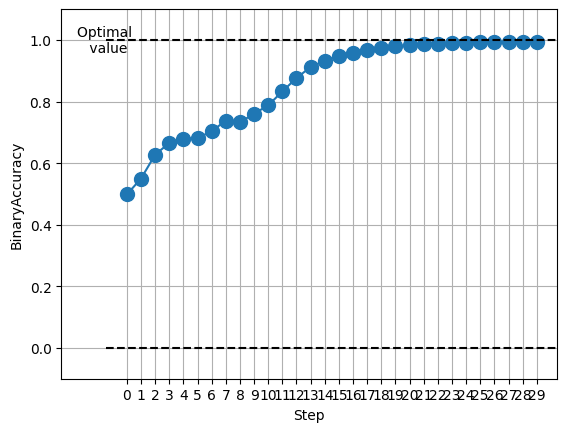

In [159]:
acc_m.plot(train_acc)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Step', ylabel='BinaryAccuracy'>)

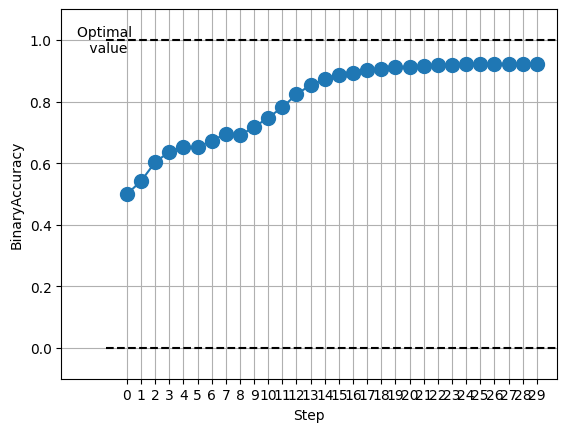

In [160]:
acc_m.plot(test_acc)

In [163]:
test_acc[-1]

tensor(0.9222)

<p class="task" id="6"></p>

6\. Придумайте небольшой отзыв, прогоните его через модель и выведите метку предсказанного класса (позитивный или негативный). Сделайте это для явно позитивного и явно негативного отзыва.

- [ ] Проверено на семинаре

In [143]:
positive_review = "Very nice and lovely film! I love it! The best! I strongly recommend to watch it"
negative_review = 'How can you watch such a movie? No plot, no good actors, not interesting. Never watch it'

In [144]:
positive_review = re.sub(r'[^\w\s]', '', positive_review.lower())
negative_review = re.sub(r'[^\w\s]', '', negative_review.lower())

In [145]:
transform = T.Sequential(
          T.ToTensor(0),
          T.PadTransform(max_length=train_dset.get_max_len(), pad_value=0)
      )

vector_pos = transform([vocab_train.lookup_indices([word])[0] for word in positive_review.split()])
vector_neg = transform([vocab_train.lookup_indices([word])[0] for word in negative_review.split()])

In [146]:
out = model(vector_pos)
out = out.reshape(out.shape[0], 2)
out.argmax(dim=1)

tensor([1])

In [147]:
out = model(vector_neg)
out = out.reshape(out.shape[0], 2)
out.argmax(dim=1)

tensor([0])

## Обратная связь
- [x] Хочу получить обратную связь по решению